In [25]:
import os
import tensorflow as tf
import numpy as np


import string
from tensorflow.keras.preprocessing.text import Tokenizer

import pandas as pd

In [26]:
os.getcwd()
myl = os.listdir('Flicker8k_Dataset/')
if "1000268201_693b08cb0e.jpg" in myl:
    print(1)

1


In [27]:
myl

['1000268201_693b08cb0e.jpg',
 '1001773457_577c3a7d70.jpg',
 '1002674143_1b742ab4b8.jpg',
 '1003163366_44323f5815.jpg',
 '1007129816_e794419615.jpg',
 '1007320043_627395c3d8.jpg',
 '1009434119_febe49276a.jpg',
 '1012212859_01547e3f17.jpg',
 '1015118661_980735411b.jpg',
 '1015584366_dfcec3c85a.jpg',
 '101654506_8eb26cfb60.jpg',
 '101669240_b2d3e7f17b.jpg',
 '1016887272_03199f49c4.jpg',
 '1019077836_6fc9b15408.jpg',
 '1019604187_d087bf9a5f.jpg',
 '1020651753_06077ec457.jpg',
 '1022454332_6af2c1449a.jpg',
 '1022454428_b6b660a67b.jpg',
 '1022975728_75515238d8.jpg',
 '102351840_323e3de834.jpg',
 '1024138940_f1fefbdce1.jpg',
 '102455176_5f8ead62d5.jpg',
 '1026685415_0431cbf574.jpg',
 '1028205764_7e8df9a2ea.jpg',
 '1030985833_b0902ea560.jpg',
 '103106960_e8a41d64f8.jpg',
 '103195344_5d2dc613a3.jpg',
 '103205630_682ca7285b.jpg',
 '1032122270_ea6f0beedb.jpg',
 '1032460886_4a598ed535.jpg',
 '1034276567_49bb87c51c.jpg',
 '104136873_5b5d41be75.jpg',
 '1042020065_fb3d3ba5ba.jpg',
 '1042590306_95dea

In [28]:
filename = "Flickr8k.token.txt"
file = open(filename, 'r')
doc = file.read()

In [29]:
doc.split('\n')[1].split('\t')

['1000268201_693b08cb0e.jpg#1', 'A girl going into a wooden building .']

In [30]:
my_dict = dict()
for line in doc.split('\n'):
    # split line by white space
    tokens = line.split(' ')
    
    # take the first token as image id, the rest as description
    image_id, image_desc = tokens[0], tokens[1:]
    
    # extract filename from image id
    image_id = image_id.split('.')[0] + '.jpg'
    if image_id in myl:    
        # convert description tokens back to string
        image_desc = ' '.join(image_desc)
        if image_id not in my_dict:
            my_dict[image_id] = list()
            my_dict[image_id].append(image_desc)
        else:
            my_dict[image_id].append(image_desc)

In [31]:
# prepare translation table for removing punctuation
table = str.maketrans('', '', string.punctuation)
for key, desc_list in my_dict.items():
    for i in range(len(desc_list)):
        desc = desc_list[i]
        # tokenize
        desc = desc.split()
        # convert to lower case
        desc = [word.lower() for word in desc]
#         print(desc)
        # remove punctuation from each token
        desc = [w.translate(table) for w in desc]
#         print(desc)
        # remove hanging 's' and 'a'
        desc = [word for word in desc if len(word)>1]
        # remove tokens with numbers in them
        desc = [word for word in desc if word.isalpha()]
        # store as string
#         print(desc,type(desc_list[i]))
        desc_list[i] =  ' '.join(desc)
    

In [32]:
type(my_dict)

dict

In [33]:
my_dict

{'1000268201_693b08cb0e.jpg': ['child in pink dress is climbing up set of stairs in an entry way',
  'girl going into wooden building',
  'little girl climbing into wooden playhouse',
  'little girl climbing the stairs to her playhouse',
  'little girl in pink dress going into wooden cabin'],
 '1001773457_577c3a7d70.jpg': ['black dog and spotted dog are fighting',
  'black dog and tricolored dog playing with each other on the road',
  'black dog and white dog with brown spots are staring at each other in the street',
  'dogs of different breeds looking at each other on the road',
  'dogs on pavement moving toward each other'],
 '1002674143_1b742ab4b8.jpg': ['little girl covered in paint sits in front of painted rainbow with her hands in bowl',
  'little girl is sitting in front of large painted rainbow',
  'small girl in the grass plays with fingerpaints in front of white canvas with rainbow on it',
  'is girl with pigtails sitting in front of rainbow painting',
  'girl with pigtails p

In [34]:
for i in my_dict.keys():
    for j in range(len(my_dict[i])):
        my_dict[i][j] = "startsequence " + my_dict[i][j] + " endsequence"

In [35]:
my_dict

{'1000268201_693b08cb0e.jpg': ['startsequence child in pink dress is climbing up set of stairs in an entry way endsequence',
  'startsequence girl going into wooden building endsequence',
  'startsequence little girl climbing into wooden playhouse endsequence',
  'startsequence little girl climbing the stairs to her playhouse endsequence',
  'startsequence little girl in pink dress going into wooden cabin endsequence'],
 '1001773457_577c3a7d70.jpg': ['startsequence black dog and spotted dog are fighting endsequence',
  'startsequence black dog and tricolored dog playing with each other on the road endsequence',
  'startsequence black dog and white dog with brown spots are staring at each other in the street endsequence',
  'startsequence dogs of different breeds looking at each other on the road endsequence',
  'startsequence dogs on pavement moving toward each other endsequence'],
 '1002674143_1b742ab4b8.jpg': ['startsequence little girl covered in paint sits in front of painted rainb

In [36]:
partition = {}
train = []
test = []
i=0
for line in open("Flickr_8k.trainImages.txt"):
    line = line.split('\n')[0]
    train.append(line)
    
for line in open("Flickr_8k.testImages.txt"):
    line = line.split('\n')[0]
    test.append(line)

In [37]:
train

['2513260012_03d33305cf.jpg',
 '2903617548_d3e38d7f88.jpg',
 '3338291921_fe7ae0c8f8.jpg',
 '488416045_1c6d903fe0.jpg',
 '2644326817_8f45080b87.jpg',
 '218342358_1755a9cce1.jpg',
 '2501968935_02f2cd8079.jpg',
 '2699342860_5288e203ea.jpg',
 '2638369467_8fc251595b.jpg',
 '2926786902_815a99a154.jpg',
 '2851304910_b5721199bc.jpg',
 '3423802527_94bd2b23b0.jpg',
 '3356369156_074750c6cc.jpg',
 '2294598473_40637b5c04.jpg',
 '1191338263_a4fa073154.jpg',
 '2380765956_6313d8cae3.jpg',
 '3197891333_b1b0fd1702.jpg',
 '3119887967_271a097464.jpg',
 '2276499757_b44dc6f8ce.jpg',
 '2506892928_7e79bec613.jpg',
 '2187222896_c206d63396.jpg',
 '2826769554_85c90864c9.jpg',
 '3097196395_ec06075389.jpg',
 '3603116579_4a28a932e2.jpg',
 '3339263085_6db9fd0981.jpg',
 '2532262109_87429a2cae.jpg',
 '2076906555_c20dc082db.jpg',
 '2502007071_82a8c639cf.jpg',
 '3113769557_9edbb8275c.jpg',
 '3325974730_3ee192e4ff.jpg',
 '1655781989_b15ab4cbff.jpg',
 '1662261486_db967930de.jpg',
 '2410562803_56ec09f41c.jpg',
 '2469498117

In [38]:
partition['train'] = train
partition['test'] = test


In [39]:
partition

{'train': ['2513260012_03d33305cf.jpg',
  '2903617548_d3e38d7f88.jpg',
  '3338291921_fe7ae0c8f8.jpg',
  '488416045_1c6d903fe0.jpg',
  '2644326817_8f45080b87.jpg',
  '218342358_1755a9cce1.jpg',
  '2501968935_02f2cd8079.jpg',
  '2699342860_5288e203ea.jpg',
  '2638369467_8fc251595b.jpg',
  '2926786902_815a99a154.jpg',
  '2851304910_b5721199bc.jpg',
  '3423802527_94bd2b23b0.jpg',
  '3356369156_074750c6cc.jpg',
  '2294598473_40637b5c04.jpg',
  '1191338263_a4fa073154.jpg',
  '2380765956_6313d8cae3.jpg',
  '3197891333_b1b0fd1702.jpg',
  '3119887967_271a097464.jpg',
  '2276499757_b44dc6f8ce.jpg',
  '2506892928_7e79bec613.jpg',
  '2187222896_c206d63396.jpg',
  '2826769554_85c90864c9.jpg',
  '3097196395_ec06075389.jpg',
  '3603116579_4a28a932e2.jpg',
  '3339263085_6db9fd0981.jpg',
  '2532262109_87429a2cae.jpg',
  '2076906555_c20dc082db.jpg',
  '2502007071_82a8c639cf.jpg',
  '3113769557_9edbb8275c.jpg',
  '3325974730_3ee192e4ff.jpg',
  '1655781989_b15ab4cbff.jpg',
  '1662261486_db967930de.jpg',
 

In [213]:
def load_image(image_path):
    image_path ='Flicker8k_Dataset/' + image_path
    img = tf.io.read_file(image_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, (299, 299))
    img = tf.keras.applications.inception_v3.preprocess_input(img)
    return img,image_path

In [215]:
image_model = tf.keras.applications.InceptionV3(include_top=True, weights='imagenet')
new_input = image_model.input
hidden_layer = image_model.layers[-2].output

image_features_extract_model = tf.keras.Model(new_input, hidden_layer)

In [216]:
image_features_extract_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [43]:
# from keras.preprocessing import image

# images = []
# train_paths=[]
# for img in partition['train']:
# #     img = os.path.join(folder_path, img)
#     img,path = load_image(img)    
#     img = image.img_to_array(img)    
#     img = np.expand_dims(img, axis=0)
#     images.append(img)
#     train_paths.append([path])

# # stack up images list to pass for prediction
# images = np.vstack(images)

# encoded_vectors  = image_features_extract_model.predict(images)

In [44]:
# train = zip(train_paths,encoded_vectors)


In [45]:
# list(train)

In [46]:
# encoded_vectors = np.reshape(len(encoded_vectors), 2048)

In [47]:
# (encoded_vectors[6998].shape)


In [48]:
import pickle
from pickle import dump, load

In [49]:

# with open("train.pkl", "wb") as encoded_pickle:
#     pickle.dump(train, encoded_pickle)

In [50]:
train_load = pickle.load(open("train.pkl", "rb"))

In [51]:
# list(train_load)
path,vec = zip(*train_load)

In [52]:
len(vec)

6000

In [53]:
path

(['Flicker8k_Dataset/2513260012_03d33305cf.jpg'],
 ['Flicker8k_Dataset/2903617548_d3e38d7f88.jpg'],
 ['Flicker8k_Dataset/3338291921_fe7ae0c8f8.jpg'],
 ['Flicker8k_Dataset/488416045_1c6d903fe0.jpg'],
 ['Flicker8k_Dataset/2644326817_8f45080b87.jpg'],
 ['Flicker8k_Dataset/218342358_1755a9cce1.jpg'],
 ['Flicker8k_Dataset/2501968935_02f2cd8079.jpg'],
 ['Flicker8k_Dataset/2699342860_5288e203ea.jpg'],
 ['Flicker8k_Dataset/2638369467_8fc251595b.jpg'],
 ['Flicker8k_Dataset/2926786902_815a99a154.jpg'],
 ['Flicker8k_Dataset/2851304910_b5721199bc.jpg'],
 ['Flicker8k_Dataset/3423802527_94bd2b23b0.jpg'],
 ['Flicker8k_Dataset/3356369156_074750c6cc.jpg'],
 ['Flicker8k_Dataset/2294598473_40637b5c04.jpg'],
 ['Flicker8k_Dataset/1191338263_a4fa073154.jpg'],
 ['Flicker8k_Dataset/2380765956_6313d8cae3.jpg'],
 ['Flicker8k_Dataset/3197891333_b1b0fd1702.jpg'],
 ['Flicker8k_Dataset/3119887967_271a097464.jpg'],
 ['Flicker8k_Dataset/2276499757_b44dc6f8ce.jpg'],
 ['Flicker8k_Dataset/2506892928_7e79bec613.jpg'],
 [

In [54]:
path[1][0].split("/")[1]
train_img_name=[]
for i in path:
    train_img_name.append(i[0].split("/")[1])

train_img_name

['2513260012_03d33305cf.jpg',
 '2903617548_d3e38d7f88.jpg',
 '3338291921_fe7ae0c8f8.jpg',
 '488416045_1c6d903fe0.jpg',
 '2644326817_8f45080b87.jpg',
 '218342358_1755a9cce1.jpg',
 '2501968935_02f2cd8079.jpg',
 '2699342860_5288e203ea.jpg',
 '2638369467_8fc251595b.jpg',
 '2926786902_815a99a154.jpg',
 '2851304910_b5721199bc.jpg',
 '3423802527_94bd2b23b0.jpg',
 '3356369156_074750c6cc.jpg',
 '2294598473_40637b5c04.jpg',
 '1191338263_a4fa073154.jpg',
 '2380765956_6313d8cae3.jpg',
 '3197891333_b1b0fd1702.jpg',
 '3119887967_271a097464.jpg',
 '2276499757_b44dc6f8ce.jpg',
 '2506892928_7e79bec613.jpg',
 '2187222896_c206d63396.jpg',
 '2826769554_85c90864c9.jpg',
 '3097196395_ec06075389.jpg',
 '3603116579_4a28a932e2.jpg',
 '3339263085_6db9fd0981.jpg',
 '2532262109_87429a2cae.jpg',
 '2076906555_c20dc082db.jpg',
 '2502007071_82a8c639cf.jpg',
 '3113769557_9edbb8275c.jpg',
 '3325974730_3ee192e4ff.jpg',
 '1655781989_b15ab4cbff.jpg',
 '1662261486_db967930de.jpg',
 '2410562803_56ec09f41c.jpg',
 '2469498117

In [55]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow.keras.utils as ku 

In [56]:
my_dict

{'1000268201_693b08cb0e.jpg': ['startsequence child in pink dress is climbing up set of stairs in an entry way endsequence',
  'startsequence girl going into wooden building endsequence',
  'startsequence little girl climbing into wooden playhouse endsequence',
  'startsequence little girl climbing the stairs to her playhouse endsequence',
  'startsequence little girl in pink dress going into wooden cabin endsequence'],
 '1001773457_577c3a7d70.jpg': ['startsequence black dog and spotted dog are fighting endsequence',
  'startsequence black dog and tricolored dog playing with each other on the road endsequence',
  'startsequence black dog and white dog with brown spots are staring at each other in the street endsequence',
  'startsequence dogs of different breeds looking at each other on the road endsequence',
  'startsequence dogs on pavement moving toward each other endsequence'],
 '1002674143_1b742ab4b8.jpg': ['startsequence little girl covered in paint sits in front of painted rainb

In [57]:
training_corpus= []
for i in partition['train']:
    for j in my_dict[i]:
        training_corpus.append(j)
training_corpus

['startsequence black dog is running after white dog in the snow endsequence',
 'startsequence dog chasing brown dog through snow endsequence',
 'startsequence dogs chase each other across the snowy ground endsequence',
 'startsequence dogs play together in the snow endsequence',
 'startsequence dogs running through low lying body of water endsequence',
 'startsequence little baby plays croquet endsequence',
 'startsequence little girl plays croquet next to truck endsequence',
 'startsequence child is playing croquette by the truck endsequence',
 'startsequence kid is in front of car with put and ball endsequence',
 'startsequence little boy is playing with croquet hammer and ball beside the car endsequence',
 'startsequence brown dog in the snow has something hot pink in its mouth endsequence',
 'startsequence brown dog in the snow holding pink hat endsequence',
 'startsequence brown dog is holding pink shirt in the snow endsequence',
 'startsequence dog is carrying something pink in 

In [58]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(training_corpus)
total_words = len(tokenizer.word_index) + 1
print(total_words)
vocab_size = total_words

7507


In [59]:
vec[1]

array([0.13564381, 0.6182131 , 0.4322084 , ..., 0.72223055, 0.3764382 ,
       0.82446456], dtype=float32)

In [60]:
encoded_image_input_train=[]
input_sequences = []
for name in partition['train']:
#     print(name)
    for line in my_dict[name]:
    #     print(line)
        index = train_img_name.index(name)
    #     print(index)
        token_list = tokenizer.texts_to_sequences([line])[0]
    #     print(token_list)
        for i in range(1, len(token_list)):
            encoded_image_input_train.append(vec[index])
            n_gram_sequence = token_list[:i+1]
            input_sequences.append(n_gram_sequence)

In [61]:
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]


In [62]:
label

array([13,  8,  6, ..., 27, 21,  2])

In [63]:
predictors[0].shape

(32,)

In [64]:
len(input_sequences)

294771

In [65]:
max_sequence_len= predictors[0].shape[0]
max_sequence_len

32

In [66]:
word_index = tokenizer.word_index
len(word_index)

7506

In [67]:
ixtoword = {v: k for k, v in word_index.items()}

In [68]:
embedding_dim=200
embeddings_index = {};
with open('glove.6B.200d.txt', encoding="utf-8") as f:
    for line in f:
        values = line.split();
        word = values[0];
        coefs = np.asarray(values[1:], dtype='float32');
        embeddings_index[word] = coefs;

embeddings_matrix = np.zeros((vocab_size, embedding_dim));
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word);
    if embedding_vector is not None:
        embeddings_matrix[i] = embedding_vector;

In [69]:
embeddings_matrix.shape

(7507, 200)

In [70]:
max_sequence_len

32

In [71]:
from keras import Input, layers
from keras.layers.merge import add
from keras.models import Model

from keras.layers import LSTM, Embedding, TimeDistributed, Dense, RepeatVector,\
                         Activation, Flatten, Reshape, concatenate, Dropout, BatchNormalization
from keras.optimizers import Adam, RMSprop

Using TensorFlow backend.


In [72]:
inputs1 = Input(shape=(2048,))
fe1 = Dropout(0.4)(inputs1)
fe2 = Dense(256, activation='relu')(fe1)
inputs2 = Input(shape=(max_sequence_len,))
se1 = Embedding(vocab_size, embedding_dim,input_length=max_sequence_len, weights=[embeddings_matrix], trainable=False)(inputs2)
se2 = Dropout(0.5)(se1)
se3 = LSTM(256)(se2)
decoder1 = add([fe2, se3])
decoded = Dropout(0.2)(decoder1)
decoder2 = Dense(256, activation='relu')(decoded)
outputs = Dense(vocab_size, activation='softmax')(decoder2)
model = Model(inputs=[inputs1, inputs2], outputs=outputs)

In [73]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 32)           0                                            
__________________________________________________________________________________________________
input_1 (InputLayer)            (None, 2048)         0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 32, 200)      1501400     input_2[0][0]                    
__________________________________________________________________________________________________
dropout_1 (Dropout)             (None, 2048)         0           input_1[0][0]                    
____________________________________________________________________________________________

In [75]:

model.compile(loss='categorical_crossentropy', optimizer='adam')

In [76]:
len(encoded_image_input_train)

294771

In [77]:
batch_size = 64
spe = int(len(encoded_image_input_train)/batch_size)
spe


4605

In [78]:
label[1]

8

In [79]:
label = ku.to_categorical(label, num_classes=total_words)

In [80]:
# def generator(encoded_image,predictors, labels, batch_size,max_len,total_words):
#     # Create empty arrays to contain batch of features and labels#
#     batch_image_features = np.zeros((batch_size, 2048))
#     batch_sent_features = np.zeros((batch_size,max_len,))
# #     batch_labels = []
#     while True:
#         batch_labels = []
#         for i in range(batch_size):
#             # choose random index in features
#             index= random.choice(range(0, len(encoded_image)))
#             batch_image_features[i] = encoded_image[index]
#             batch_sent_features[i] = predictors[index]
# #             batch_labels[i] = labels[index]
#             batch_labels.append(ku.to_categorical(labels[index], num_classes=total_words))
#         batch_labels = np.array(batch_labels)
# #         print(batch_image_features.shape,batch_sent_features.shape,batch_labels.shape)
#         yield [batch_image_features,batch_sent_features], batch_labels

In [81]:
model.fit([encoded_image_input_train,predictors],label,batch_size=160,epochs=3)
# model.fit_generator(generator(encoded_image_input_train,predictors, label,batch_size,max_sequence_len,total_words), steps_per_epoch=spe,epochs=5)

Epoch 1/3
294771/294771 [==============================] - 219s 744us/step - loss: 4.5592
Epoch 2/3
294771/294771 [==============================] - 228s 774us/step - loss: 3.7976
Epoch 3/3
294771/294771 [==============================] - 230s 780us/step - loss: 3.5338


In [82]:

model.fit([encoded_image_input_train,predictors],label,batch_size=160,epochs=5)

Epoch 1/5
294771/294771 [==============================] - 223s 757us/step - loss: 3.3743
Epoch 2/5
294771/294771 [==============================] - 225s 762us/step - loss: 3.2625
Epoch 3/5
294771/294771 [==============================] - 224s 759us/step - loss: 3.1752
Epoch 4/5
294771/294771 [==============================] - 224s 758us/step - loss: 3.1085
Epoch 5/5
294771/294771 [==============================] - 225s 762us/step - loss: 3.0553


In [101]:
model.optimizer.learning_rate = 0.0005
model.fit([encoded_image_input_train,predictors],label,batch_size=160,epochs=1)

Epoch 1/1
294771/294771 [==============================] - 218s 739us/step - loss: 3.0111


In [102]:
model.optimizer.learning_rate = 0.0001
model.fit([encoded_image_input_train,predictors],label,batch_size=160,epochs=1)

Epoch 1/1
294771/294771 [==============================] - 225s 762us/step - loss: 2.9786


In [103]:

model.save_weights('./model4.h5')

In [217]:
from keras.preprocessing import image

images = []
test_paths=[]
for img in partition['test']:
#     img = os.path.join(folder_path, img)
    img,path = load_image(img)    
    img = image.img_to_array(img)    
    img = np.expand_dims(img, axis=0)
    images.append(img)
    test_paths.append([path])

# stack up images list to pass for prediction
images = np.vstack(images)

encoded_vectors  = image_features_extract_model.predict(images)

In [218]:
with open("encoded_test_images1.pkl", "wb") as encoded_pickle:
    pickle.dump(encoded_vectors, encoded_pickle)

In [219]:
encoded_test_vectors = load(open("encoded_test_images1.pkl","rb"))

In [86]:
def pSearch(photo):
    in_text = 'startsequence'
#     sequence=[3]
    for i in range(max_sequence_len):
        sequence = [word_index[w] for w in in_text.split() if w in word_index]
        sequence = pad_sequences([sequence], maxlen=max_sequence_len)
#         print(sequence)
        yhat = model.predict([photo,sequence], verbose=0)
        yhat = np.argmax(yhat)
#         print(yhat)
        word = ixtoword[yhat]
        in_text += ' ' + word
        if word == 'endsequence':
            break
    final = in_text.split()
    final = final[1:-1]
    final = ' '.join(final)
    return final

In [220]:
test_paths

[['Flicker8k_Dataset/3385593926_d3e9c21170.jpg'],
 ['Flicker8k_Dataset/2677656448_6b7e7702af.jpg'],
 ['Flicker8k_Dataset/311146855_0b65fdb169.jpg'],
 ['Flicker8k_Dataset/1258913059_07c613f7ff.jpg'],
 ['Flicker8k_Dataset/241347760_d44c8d3a01.jpg'],
 ['Flicker8k_Dataset/2654514044_a70a6e2c21.jpg'],
 ['Flicker8k_Dataset/2339106348_2df90aa6a9.jpg'],
 ['Flicker8k_Dataset/256085101_2c2617c5d0.jpg'],
 ['Flicker8k_Dataset/280706862_14c30d734a.jpg'],
 ['Flicker8k_Dataset/3072172967_630e9c69d0.jpg'],
 ['Flicker8k_Dataset/3482062809_3b694322c4.jpg'],
 ['Flicker8k_Dataset/1167669558_87a8a467d6.jpg'],
 ['Flicker8k_Dataset/2847615962_c330bded6e.jpg'],
 ['Flicker8k_Dataset/3344233740_c010378da7.jpg'],
 ['Flicker8k_Dataset/2435685480_a79d42e564.jpg'],
 ['Flicker8k_Dataset/3110649716_c17e14670e.jpg'],
 ['Flicker8k_Dataset/2511019188_ca71775f2d.jpg'],
 ['Flicker8k_Dataset/2521770311_3086ca90de.jpg'],
 ['Flicker8k_Dataset/2723477522_d89f5ac62b.jpg'],
 ['Flicker8k_Dataset/2218609886_892dcd6915.jpg'],
 ['F

In [109]:
test_list = partition['test']
type(test_list)


list

In [89]:
test_list[1]

'2903617548_d3e38d7f88.jpg'

In [90]:
import matplotlib.pyplot as plt

In [91]:
z=0

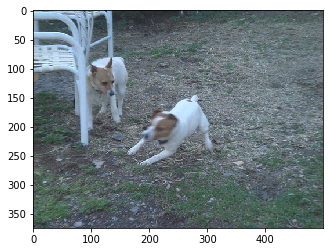

Greedy: white dog is running through the grass


array([[0.18175082, 2.0638275 , 0.12197638, ..., 0.04279743, 0.14760417,
        1.0165954 ]], dtype=float32)

In [228]:
z+=1
pic = test_paths[z][0]
image = encoded_test_vectors[z]
# pic = test_list[z-30]
image=image.reshape(1,2048)
x=plt.imread(pic)
plt.imshow(x)
plt.show()
print("Greedy:",pSearch(image))
image

In [211]:
# encoded_image_input_train[11]

array([0.16182034, 0.14616564, 0.08214632, ..., 0.10798354, 1.438901  ,
       0.44214386], dtype=float32)